In [1]:
import os
print(os.getcwd())

c:\Users\acer\OneDrive\Documents\GitHub\dl_assignment_ed24s401


In [2]:
import numpy as np
import pandas as pd
import wandb

wandb.login()
!pip install tensorflow


   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 1.3/390.2 MB 8.4 MB/s eta 0:00:47
   ---------------------------------------- 2.4/390.2 MB 6.7 MB/s eta 0:00:58
   ---------------------------------------- 4.2/390.2 MB 7.2 MB/s eta 0:00:54
    --------------------------------------- 6.6/390.2 MB 8.2 MB/s eta 0:00:47
    --------------------------------------- 7.6/390.2 MB 8.5 MB/s eta 0:00:45
    --------------------------------------- 9.7/390.2 MB 8.1 MB/s eta 0:00:48
   - -------------------------------------- 11.5/390.2 MB 8.3 MB/s eta 0:00:46
   - -------------------------------------- 13.6/390.2 MB 8.4 MB/s eta 0:00:45
   - -------------------------------------- 15.7/390.2 MB 8.5 MB/s eta 0:00:44
   - -------------------------------------- 17.0/390.2 MB 8.3 MB/s eta 0:00:45
   - -------------------------------------- 18.1/390.2 MB 8.0 MB/s eta 0:00:47
   - -------------------------------------- 19.4/390.2 MB 7.9 MB/s

ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    unknown package:
        Expected sha256 af380d326e146f2d184a940ccf8350e9b6dc06a0530bfaa3a557b73819c4017b
             Got        128b96bf7abfbe90cb043afd614a16474cdbdd2889bbd267beebbccd1bae6223



In [5]:
import matplotlib.pyplot as plt
!pip install keras


  Using cached keras-3.9.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached h5py-3.13.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached optree-0.14.1-cp311-cp311-win_amd64.whl.metadata (50 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
Using cached keras-3.9.0-py3-none-any.whl (1.3 MB)
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
Using cached h5py-3.13.0-cp311-cp311-win_amd64.whl (3.0 MB)
Using cached namex-0.0.8-py3-none-any.whl (5.8 kB)
Using cached optree-0.14.1-cp311-cp311-win_amd64.whl (305 kB)
Using cached rich-13.9.4-py3-none-any.whl (242 kB)
Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)


In [1]:
import tensorflow as tf
print(tf.__version__)


2.18.0


Answer 1.

In [10]:
import numpy as np
import wandb
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ed24s401 (ed24s401-indian-institute-of-technology-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


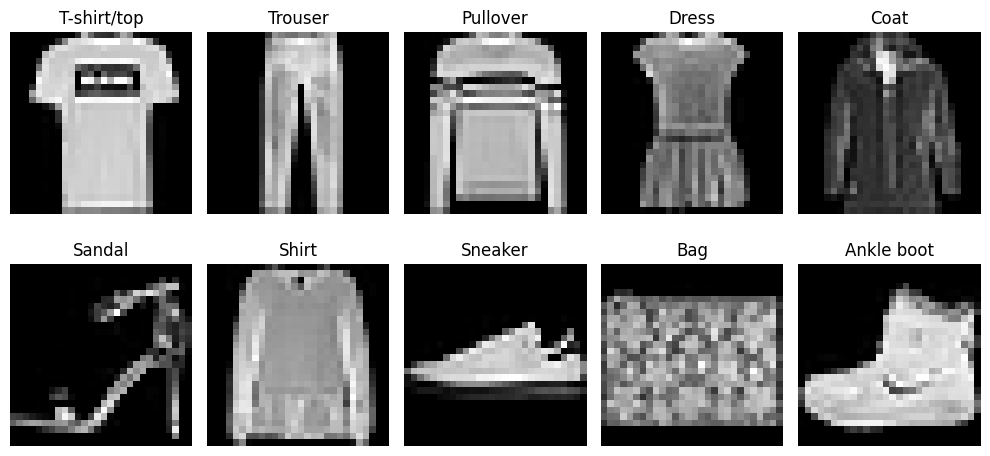

In [ ]:

wandb.init(project='fashion-MNIST dataset', name='fashion-MNIST samples')
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_lbs=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
fig, axes=plt.subplots(2,5, figsize=(10,5))
axes=axes.flatten()
marked_img=[]

for i in range(10):
    idx=np.where(y_train ==i)[0][0]
    axes[i].imshow(x_train[idx], cmap='gray')
    axes[i].set_title(class_lbs[i])
    axes[i].axis('off')
    marked_img.append(wandb.Image(x_train[idx], caption=class_lbs[i]))

plt.tight_layout() 
plt.show()
#logging figure to wandb
wandb.log({"fashion-MNIST samples": marked_img})
wandb.finish()



Answer 2.

In [ ]:
import numpy as np
import wandb
from keras.datasets import fashion_mnist

#loading the dataset
(x_train_full, y_train_full), (x_test,y_test)=fashion_mnist.load_data()
 
 #normalize images
x_train_full=x_train_full.reshape(x_train_full.shape[0], -1)/255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
#shuffle dataset
np.random.seed(42)
indices=np.arange(x_train_full.shape[0])
np.random.shuffle(indices)

x_train_full, y_train_full=x_train_full[indices], y_train_full[indices]

# splitting the dataset into training(85%) and validation(15%)
train_size=int(.85*len(x_train_full))

x_train, y_train=x_train_full[:train_size],y_train_full[:train_size]
x_val, y_val=x_train_full[train_size:], y_train_full[train_size:]

#converting truth(y) into one hot vector
t_classes=10
y_train_1h=np.eye(t_classes)[y_train]
y_val_1h=np.eye(t_classes)[y_val]

# print(f"Train set: {x_train.shape}, Validation set: {x_val.shape}, Test set: {x_test.shape}") #Train set: (51000, 784), Validation set: (9000, 784), Test set: (10000, 784)
# print(f"\n{y_train_1h.shape},  {y_val_1h.shape}") #(51000, 10), (9000, 10)



Train set: (51000, 784), Validation set: (9000, 784), Test set: (10000, 784)

(51000, 10), 
 (9000, 10)
